In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [6,8],
    [9,5],
    [8,7],
    [10,8],
]

In [4]:
from preprocessing import LDA

In [5]:
data=np.concatenate([data_1 ,data_2], )

labels = np.

In [6]:
l = LDA(data)

In [7]:
l.data.shape

(2, 5, 2)

In [8]:
print(l.mean)

[[[3.  3.6]]

 [[8.4 7.6]]]


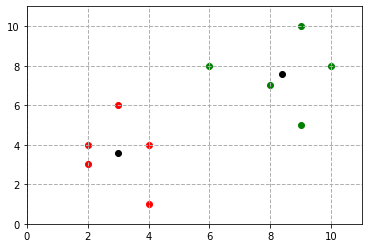

In [9]:
l.grad_show()

# 그래프 그리기

In [10]:
x1 = np.array(data_1)
x2 = np.array(data_2)

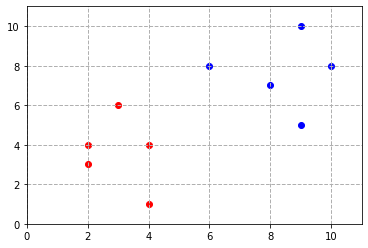

In [11]:
import matplotlib.pyplot as plt
# x1과 x2의 최소값과 최대값 계산
min_x = min(0, 11)
max_x = max(0, 11)

# 축 범위 설정
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_x)
plt.scatter(x1[:,0], x1[:,1], color="r")
plt.scatter(x2[:,0], x2[:,1], color="b")
# plt.scatter(u1[0], u1[1], color="g")
# plt.scatter(u2[0], u2[1], color="g")

plt.grid(True, linestyle='--', linewidth=1)
plt.show()

In [12]:
u1 = l.mean[0]
u2 = l.mean[1]

In [13]:
l.set_scatter_b_matrix()

값 :  [[-5.4]
 [-4. ]]


array([[29.16, 21.6 ],
       [21.6 , 16.  ]])

# Scatter_W 구하기

In [14]:
# s1 = np.cov((x1 - u1), bias=True, rowvar=False)
# s2 = np.cov((x2 - u2), bias=True, rowvar=False)

In [15]:
# print(s1)
# s_w = s1 + s2
# print(s_w)

In [16]:
l.set_scatter_b_matrix()

값 :  [[-5.4]
 [-4. ]]


array([[29.16, 21.6 ],
       [21.6 , 16.  ]])

In [17]:
u12 = (u1 - u2).reshape(-1, 1)
u12

array([[-5.4],
       [-4. ]])

In [18]:
s_b = u12 @ u12.T
s_b

array([[29.16, 21.6 ],
       [21.6 , 16.  ]])

In [19]:
l.set_scatter_w_matrix()

array([[ 2.64, -0.44],
       [-0.44,  5.28]])

In [20]:
result = l.get_lda(num=1)

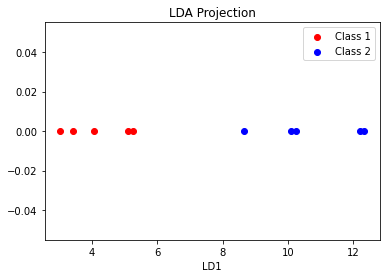

In [21]:
plt.scatter(result[0], np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(result[1], np.zeros(len(x2)), color='b', label='Class 2')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

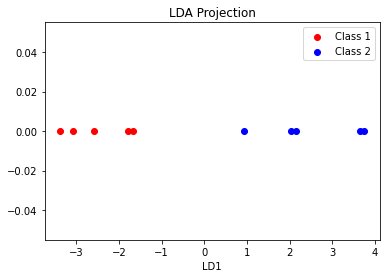

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 모델 초기화
lda = LDA(n_components=1)  # 투영할 차원 수를 1로 설정
# 데이터에 모델 적용
x_combined = np.vstack(((x1), (x2)))
y_combined = np.hstack((np.zeros(len(x1)), np.ones(len(x2))))  # 클래스 레이블 생성

lda.fit(x_combined, y_combined)

x_lda = lda.transform(x_combined)

# 투영된 데이터 플로팅
plt.scatter(x_lda[y_combined == 0], np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(x_lda[y_combined == 1], np.zeros(len(x2)), color='b', label='Class 2')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

# 다중 분류

In [95]:
import numpy as np

In [96]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [7,8],
    [9,5],
    [8,7],
    [10,8],
]

data_3 = [
    [5, 17],
    [3, 13],
    [5, 15],
    [4, 19],
    [4, 14],
]

In [97]:
x1= np.array(data_1)
x2= np.array(data_2)
x3 = np.array(data_3)

In [98]:
data=np.array([
    data_1,
    data_2,
    data_3
])

print(data.shape)

(3, 5, 2)


In [99]:
from preprocessing import LDA

l = LDA(data)

In [100]:
l.mean

array([[[ 3. ,  3.6]],

       [[ 8.6,  7.6]],

       [[ 4.2, 15.6]]])

In [101]:
l.U

array([[5.26666667, 8.93333333]])

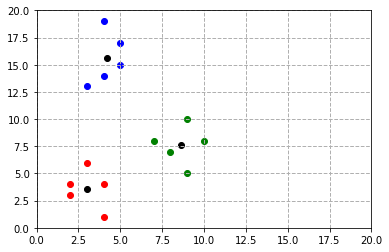

In [102]:
l.grad_show()

In [103]:
l.mean

array([[[ 3. ,  3.6]],

       [[ 8.6,  7.6]],

       [[ 4.2, 15.6]]])

In [104]:
u1 = x1.mean(0)
u2 = x2.mean(0)
u3 = x3.mean(0)
print(u1)
print(u2)
print(u3)

[3.  3.6]
[8.6 7.6]
[ 4.2 15.6]


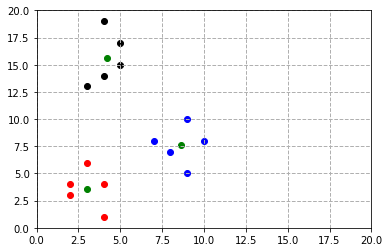

In [105]:
import matplotlib.pyplot as plt
# x1과 x2의 최소값과 최대값 계산
min_x = min(0, 20)
max_x = max(0, 20)

# 축 범위 설정
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_x)
plt.scatter(x1[:,0], x1[:,1], color="r")
plt.scatter(x2[:,0], x2[:,1], color="b")
plt.scatter(x3[:,0], x3[:,1], color="k")
plt.scatter(u1[0], u1[1], color="g")
plt.scatter(u2[0], u2[1], color="g")
plt.scatter(u3[0], u3[1], color="g")
            

plt.grid(True, linestyle='--', linewidth=1)
plt.show()

In [106]:
s1 = np.cov((x1 - u1), bias=True, rowvar=False)
s2 = np.cov((x2 - u2), bias=True, rowvar=False)
s3 = np.cov((x3 - u3), bias=True, rowvar=False)

In [107]:
s1

array([[ 0.8 , -0.4 ],
       [-0.4 ,  2.64]])

In [108]:
s_w = s1 + s2 + s3

In [109]:
s_w

array([[2.4 , 0.32],
       [0.32, 9.92]])

In [110]:
l.set_scatter_w_matrix()

array([[2.4 , 0.32],
       [0.32, 9.92]])

In [111]:
print(x1.sum(0))

[15 18]


In [112]:
print(x2.sum(0))

[43 38]


In [113]:
print(x3.sum(0))

[21 78]


In [114]:
(l.mean * 5).sum(axis=0)



array([[ 79., 134.]])

In [115]:
# u = (x1 + x2 + x3).sum(axis=0) / 25
u = ((u1 * 5) + (u2 * 5) + (u3 * 5)) / 15
u

array([5.26666667, 8.93333333])

In [116]:
u = np.concatenate([x1, x2, x3], axis=0).mean(0)

In [117]:
print(u)

[5.26666667 8.93333333]


In [118]:
l.U[0, 0]

5.266666666666667

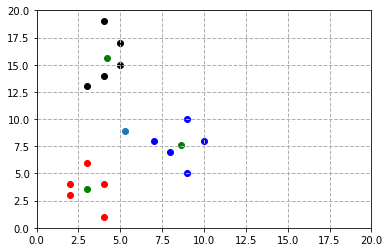

In [119]:
# 축 범위 설정
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_x)
plt.scatter(x1[:,0], x1[:,1], color="r")
plt.scatter(x2[:,0], x2[:,1], color="b")
plt.scatter(x3[:,0], x3[:,1], color="k")
plt.scatter(u1[0], u1[1], color="g")
plt.scatter(u2[0], u2[1], color="g")
plt.scatter(u3[0], u3[1], color="g")
plt.scatter(l.U[0, 0], l.U[0,1])

plt.grid(True, linestyle='--', linewidth=1)
plt.show()

In [120]:
u_s_1 = (u1 - u).reshape(-1 ,1)

In [121]:
u12 = (u1 - u2).reshape(-1, 1)
s_b = u12 @ u12.T
s_b

array([[31.36, 22.4 ],
       [22.4 , 16.  ]])

In [122]:
u_s_2 = (u2 - u).reshape(-1 ,1)

In [123]:
u_s_3 = (u3 - u).reshape(-1 ,1)

In [124]:
print(u_s_1)
print(u_s_2)
print(u_s_3)

[[-2.26666667]
 [-5.33333333]]
[[ 3.33333333]
 [-1.33333333]]
[[-1.06666667]
 [ 6.66666667]]


In [125]:
l.set_scatter_b_matrix()

array([[ 86.933334 ,   2.6666658],
       [  2.6666658, 373.33334  ]], dtype=float32)

In [169]:
result = l.get_lda(1)

[[ 0.82172926 -0.9490501 ]
 [-0.56987808 -0.31512522]]


In [151]:
result[0]

array([[ 2.71703895],
       [-0.6360538 ],
       [-0.06617572],
       [-0.95408071],
       [ 1.00740471]])

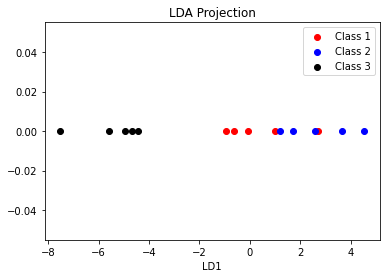

In [168]:
plt.scatter(result[0], np.zeros(len(result[0])), color='r', label='Class 1')
plt.scatter(result[1], np.zeros(len(result[1])), color='b', label='Class 2')
plt.scatter(result[2], np.zeros(len(result[2])), color='k', label='Class 3')

plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

In [126]:
s_b = (5*(u_s_1 @ u_s_1.T)) +(5*(u_s_2 @ u_s_2.T)) + (5*(u_s_3 @ u_s_3.T))

In [127]:
s_b

array([[ 86.93333333,   2.66666667],
       [  2.66666667, 373.33333333]])

In [55]:
s_w

array([[2.4 , 0.32],
       [0.32, 9.92]])

In [44]:
s_w

array([[2.4 , 0.32],
       [0.32, 9.92]])

In [45]:
s1

array([[ 0.8 , -0.4 ],
       [-0.4 ,  2.64]])

In [46]:
s1 = np.cov((x1 - u1), bias=True, rowvar=False)
s2 = np.cov((x2 - u2), bias=True, rowvar=False)
s3 = np.cov((x3 - u3), bias=True, rowvar=False)

In [171]:
eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.inv(s_w), s_b))

In [172]:
idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]
print(eigen_vectors)

[[ 0.82172928 -0.94905009]
 [-0.56987804 -0.31512525]]


In [186]:
l.get_lda()

array([[[ 2.71703895],
        [-0.6360538 ],
        [-0.06617572],
        [-0.95408071],
        [ 1.00740471]],

       [[ 1.69678252],
        [ 1.19308017],
        [ 4.54617292],
        [ 2.5846875 ],
        [ 3.65826794]],

       [[-5.57928107],
        [-4.94322727],
        [-4.43952491],
        [-7.54076649],
        [-4.69137609]]])

In [184]:
import numpy as np

class CustomLDA:
    def fit(self, X, y):
        # 클래스별 샘플 평균 계산
        unique_classes = np.unique(y)
        mean_vectors = [np.mean(X[y == c], axis=0) for c in unique_classes]

        # 클래스 간 산포 행렬과 클래스 내 산포 행렬 계산
        S_W = np.zeros((X.shape[1], X.shape[1]))
        S_B = np.zeros((X.shape[1], X.shape[1]))
        overall_mean = np.mean(X, axis=0)
        for c, mean_vec in zip(unique_classes, mean_vectors):
            class_scatter = np.dot((X[y == c] - mean_vec).T, X[y == c] - mean_vec)
            print(class_scatter)
            # raise 100
            S_W += class_scatter
            n = X[y == c].shape[0]
            mean_diff = (mean_vec - overall_mean).reshape(-1, 1)
            S_B += n * np.dot(mean_diff, mean_diff.T)

        # 고유값 분해
        eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))

        # 고유값과 고유벡터를 내림차순으로 정렬
        idx = eigen_values.argsort()[::-1]
        eigen_values = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx]

        # 클래스 간 분산과 클래스 내 분산의 고유벡터 선택
        self.w = eigen_vectors[:, :len(unique_classes) - 1].real

    def transform(self, X):
        return np.dot(X, self.w)

# 사용 예시
# CustomLDA 모델 초기화
custom_lda = CustomLDA()

# 데이터에 모델 적용
x_combined = np.vstack((x1, x2, x3))  # 세 클래스의 데이터를 합침
y_combined = np.hstack((np.zeros(len(x1)), np.ones(len(x2)), 2 * np.ones(len(x3))))  # 클래스 레이블 생성

# LDA 모델 훈련
custom_lda.fit(x_combined, y_combined)

# 데이터를 저차원으로 투영
x_lda_custom = custom_lda.transform(x_combined)[:,0]
x_lda_custom

[[ 4.  -2. ]
 [-2.  13.2]]
[[ 5.2  0.2]
 [ 0.2 13.2]]
[[ 2.8  3.4]
 [ 3.4 23.2]]


array([ 2.7170391 , -0.6360536 , -0.06617556, -0.9540804 ,  1.00740497,
        1.69678315,  1.19308066,  4.54617336,  2.58468799,  3.65826851,
       -5.57928028, -4.94322669, -4.4395242 , -7.54076565, -4.69137544])

Text(0.5, 0, 'LD1')

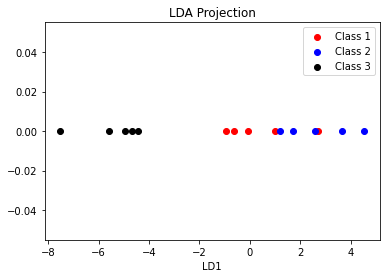

In [185]:
plt.scatter(x_lda_custom[y_combined == 0], np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(x_lda_custom[y_combined == 1], np.zeros(len(x2)), color='b', label='Class 2')
# 투영된 데이터 플로팅
plt.scatter(x_lda_custom[y_combined == 2], np.zeros(len(x1)), color='k', label='Class 3')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
# plt.show()

Text(0.5, 0, 'LD1')

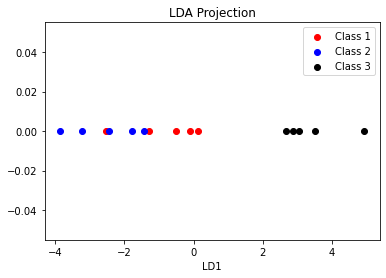

In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 모델 초기화
lda = LDA(n_components=1)  # 투영할 차원 수를 1로 설정

# 데이터에 모델 적용
x_combined = np.vstack((x1, x2, x3))
y_3 = np.zeros(len(x3)) + 2
y_combined = np.hstack((np.zeros(len(x1)), np.ones(len(x2)), y_3))  # 클래스 레이블 생성

lda.fit(x_combined, y_combined)

x_lda = lda.transform(x_combined)

# 투영된 데이터 플로팅
plt.scatter(x_lda[y_combined == 0], np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(x_lda[y_combined == 1], np.zeros(len(x2)), color='b', label='Class 2')
# 투영된 데이터 플로팅
plt.scatter(x_lda[y_combined == 2], np.zeros(len(x1)), color='k', label='Class 3')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
# plt.show()

In [ ]:
"print(x_)